# Hierarchial Clustering

In [68]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
#from scipy.cluster.hierarchy import foluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as seaborn
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [69]:
car_df=pd.read_csv("cars.csv")
car_df.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [70]:
car_df.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']


In [71]:
X=car_df.drop(['car_names','cyl','drat','am','qsec','vs','gear','carb'],axis=1)
y=car_df['am']


In [72]:
X

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875
2,22.8,108.0,93,2.320
3,21.4,258.0,110,3.215
4,18.7,360.0,175,3.440
5,18.1,225.0,105,3.460
6,14.3,360.0,245,3.570
7,24.4,146.7,62,3.190
8,22.8,140.8,95,3.150
9,19.2,167.6,123,3.440


In [73]:
y



0     1
1     1
2     1
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    1
18    1
19    1
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: am, dtype: int64

In [74]:
#Linkage function carries out hierarchial clustering on our data
z=linkage(X,'ward')


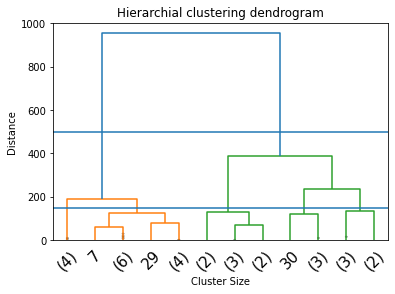

In [75]:
#generate dendrogram and format it
d=dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=45,leaf_font_size=15,show_contracted=True)
plt.title("Hierarchial clustering dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

#axial lines to determine the number of clusters
plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [76]:
d['color_list']

['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']

In [77]:
uc=set(d['color_list'])
uc

{'C0', 'C1', 'C2'}

In [78]:
optimal_number_of_clusters=len(uc)-1
optimal_number_of_clusters

2

In [79]:
Hclustering=AgglomerativeClustering(n_clusters=optimal_number_of_clusters,affinity='euclidean',linkage='ward')
Hclustering.fit(X)
sm.accuracy_score(y,Hclustering.labels_)

0.78125